In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Exercise 1

In [3]:
def calc_r2_score(x, y):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    return r2_score(y, y_pred)

In [4]:
score_3 = calc_r2_score(X[:, np.newaxis, 0], X[:, np.newaxis, 2])
score_2 = calc_r2_score(X[:, np.newaxis, 0], X[:, np.newaxis, 1])
score_4 = calc_r2_score(X[:, np.newaxis, 0], X[:, np.newaxis, 3])

print("R2 score between feature 1 and 3: ", score_3)
print("R2 score between feature 1 and 3: ", score_2)
print("R2 score between feature 1 and 3: ", score_4)

R2 score between feature 1 and 3:  0.759954645772515
R2 score between feature 1 and 3:  0.013822654141080748
R2 score between feature 1 and 3:  0.6690276860464137


# Exercise 2

### Prepare data

In [5]:
train_idx = np.random.choice(np.arange(len(X)), int(0.6 * len(X)))

In [6]:
idx = np.where(y != 2)
y = y[idx]
y = np.where(y == 1, 1, -1)
X = X[idx]

In [7]:
def train_test_split(X, y, size=0.6):
    train_idx = np.random.choice(np.arange(len(X)), int(size * len(X)))
    test_idx = list(set(np.arange(len(X))) - set(train_idx))
    return X[train_idx, ], X[test_idx, ], y[train_idx], y[test_idx]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Without normalisation

In [9]:
def calc_mse(X, y, w):
    y_pred = X.dot(w)
    return np.sum((X.dot(w) - y) ** 2) / len(y)

def calc_accuracy(X, y, w):
    return sum(np.where(X.dot(w) > 0, 1, -1) == y) / len(y)

def calc_gradient(X, y, w):
    y_pred = X.dot(w)
    error = (y - y_pred)
    return -(1.0/len(X)) * error.dot(X)

def gradient_descent(X, y, start, learning_rate, n_iter, verbose=False):
    w = start
    for i in range(n_iter):
        w -= learning_rate * calc_gradient(X, y, w)
        if i % 10 == 0 and verbose:
            print("MSE: ", round(calc_mse(X, y, w), 4))
            print("Accuracy: ", round(calc_accuracy(X, y, w), 4))
    return w

In [10]:
w_final = gradient_descent(X_train, y_train, np.random.normal(size=4), 0.01, 100, verbose=True)
print(w_final)

MSE:  8.394
Accuracy:  0.0167
MSE:  4.5266
Accuracy:  0.0
MSE:  3.0535
Accuracy:  0.0
MSE:  2.065
Accuracy:  0.0
MSE:  1.4017
Accuracy:  0.1833
MSE:  0.9566
Accuracy:  0.6333
MSE:  0.6578
Accuracy:  0.8667
MSE:  0.4573
Accuracy:  0.9833
MSE:  0.3228
Accuracy:  0.9833
MSE:  0.2325
Accuracy:  1.0
[-0.1341415  -0.20309934  0.55790609 -0.40039935]


In [11]:
print("Train MSE: ", round(calc_mse(X_train, y_train, w_final), 4))
print("Train Accuracy: ", round(calc_accuracy(X_train, y_train, w_final), 4))
print("Test MSE: ", round(calc_mse(X_test, y_test, w_final), 4))
print("Test Accuracy: ", round(calc_accuracy(X_test, y_test, w_final), 4))

Train MSE:  0.1769
Train Accuracy:  1.0
Test MSE:  0.2353
Test Accuracy:  1.0


### Do 30 iterations and plot test accuracy

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 28.]),
 array([0.81666667, 0.835     , 0.85333333, 0.87166667, 0.89      ,
        0.90833333, 0.92666667, 0.945     , 0.96333333, 0.98166667,
        1.        ]),
 <a list of 10 Patch objects>)

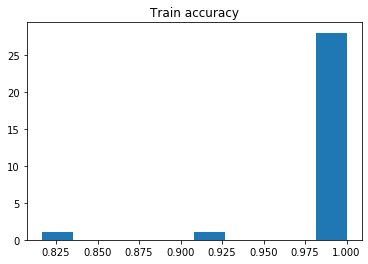

In [12]:
weights = [gradient_descent(X_train, y_train, np.random.normal(size=4), 0.01, 100) for i in range(30)]

train_accuracy = np.array([
    calc_accuracy(X_train, y_train, weight) for weight in weights])
test_accuracy = np.array([
    calc_accuracy(X_test, y_test, weight) for weight in weights])

plt.title("Train accuracy")
plt.hist(train_accuracy)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1., 26.]),
 array([0.67857143, 0.71071429, 0.74285714, 0.775     , 0.80714286,
        0.83928571, 0.87142857, 0.90357143, 0.93571429, 0.96785714,
        1.        ]),
 <a list of 10 Patch objects>)

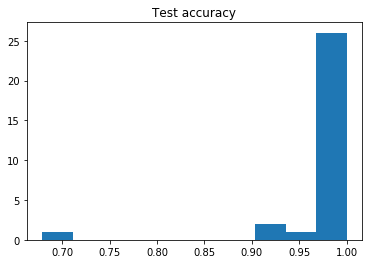

In [13]:
plt.title("Test accuracy")
plt.hist(test_accuracy)

### With normalisation

In [14]:
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)

X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std

In [15]:
w_final_norm = gradient_descent(X_train_norm, y_train, np.random.normal(size=4), 0.01, 100, verbose=True)
print(w_final_norm)

MSE:  0.3252
Accuracy:  0.95
MSE:  0.2954
Accuracy:  0.95
MSE:  0.271
Accuracy:  0.95
MSE:  0.2503
Accuracy:  0.9667
MSE:  0.2325
Accuracy:  0.9667
MSE:  0.2171
Accuracy:  0.9667
MSE:  0.2037
Accuracy:  0.9667
MSE:  0.1919
Accuracy:  1.0
MSE:  0.1815
Accuracy:  1.0
MSE:  0.1724
Accuracy:  1.0
[0.10823635 0.15314072 0.52765847 0.44976526]


In [16]:
print("Train MSE: ", round(calc_mse(X_train_norm, y_train, w_final_norm), 4))
print("Train Accuracy: ", round(calc_accuracy(X_train_norm, y_train, w_final_norm), 4))
print("Test MSE: ", round(calc_mse(X_test_norm, y_test, w_final_norm), 4))
print("Test Accuracy: ", round(calc_accuracy(X_test_norm, y_test, w_final_norm), 4))

Train MSE:  0.1652
Train Accuracy:  1.0
Test MSE:  0.2405
Test Accuracy:  1.0


### Do 30 iterations and plot test accuracy

(array([ 3.,  0.,  2.,  4.,  0.,  1.,  3.,  2.,  1., 14.]),
 array([0.78333333, 0.805     , 0.82666667, 0.84833333, 0.87      ,
        0.89166667, 0.91333333, 0.935     , 0.95666667, 0.97833333,
        1.        ]),
 <a list of 10 Patch objects>)

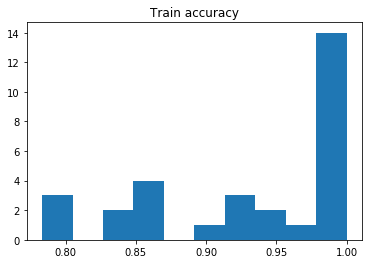

In [17]:
weights = [gradient_descent(X_train_norm, y_train, np.random.normal(size=4), 0.01, 100) for i in range(30)]

train_accuracy = np.array([
    calc_accuracy(X_train_norm, y_train, weight) for weight in weights])
test_accuracy = np.array([
    calc_accuracy(X_test_norm, y_test, weight) for weight in weights])

plt.title("Train accuracy")
plt.hist(train_accuracy)

(array([ 1.,  0.,  2.,  1.,  1.,  1.,  0.,  6.,  4., 14.]),
 array([0.67857143, 0.71071429, 0.74285714, 0.775     , 0.80714286,
        0.83928571, 0.87142857, 0.90357143, 0.93571429, 0.96785714,
        1.        ]),
 <a list of 10 Patch objects>)

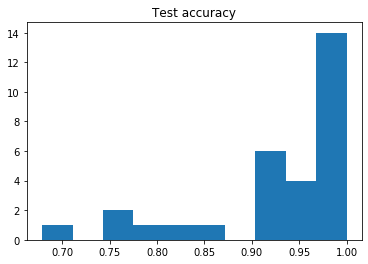

In [18]:
plt.title("Test accuracy")
plt.hist(test_accuracy)